In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Generate simulated reflectometry signal

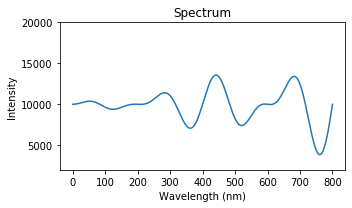

In [2]:
n = 1000
t = 1/800
x = np.linspace(0,800,799)
y = (500*np.sin(2* 2*np.pi * x) + 350*np.sin(3 * 2*np.pi * x))*(0.01*x) + 10000

fig, ax = plt.subplots(figsize=(5,3))
plt.plot(x, y)
plt.title("Spectrum")
plt.ylim(2000,20000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.tight_layout()

## Data augmentation on simulated reflectometry signal

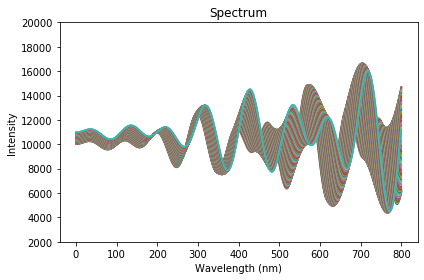

In [3]:
n = 1000
t = 1/800
x = np.linspace(0,800,799)

sample = 100

data = np.zeros((sample, 799))

for i in range(sample):
    y = (500*np.sin(2*np.pi * x * 0.001*(10+(sample-i)/sample)) + 350*np.sin(3 * 2*np.pi * x))*(0.01*x) + 10000 + 10*i
    data[i,:] = y
    plt.plot(x, y)
    plt.ylim(2000,20000)
    plt.title("Spectrum")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.tight_layout()

## Normalize the spectrum

In [4]:
data[:5,:10]

array([[10000.        , 10000.51273147, 10002.04685564, 10004.59018819,
        10008.12250996, 10012.61569838, 10018.03391038, 10024.33381567,
        10031.46487894, 10039.36968923],
       [10010.        , 10010.51241649, 10012.04560479, 10014.58740768,
        10018.11765079, 10022.60827353, 10028.02351119, 10034.32012735,
        10041.44769485, 10049.34892392],
       [10020.        , 10020.51210151, 10022.04435392, 10024.58462706,
        10028.11279128, 10032.60084783, 10038.01311027, 10044.30643585,
        10051.43050541, 10059.32815014],
       [10030.        , 10030.51178653, 10032.04310303, 10034.58184633,
        10038.10793142, 10042.59342129, 10048.00270762, 10054.29274117,
        10061.41331061, 10069.30736791],
       [10040.        , 10040.51147155, 10042.04185211, 10044.57906549,
        10048.10307121, 10052.58599392, 10057.99230324, 10064.27904333,
        10071.39611047, 10079.28657724]])

In [5]:
scaler = MinMaxScaler((4000,16000))
data_T = scaler.fit_transform(data.transpose())
data = data_T.transpose()
data[:5, :10]

array([[10063.81954925, 10064.45044002, 10066.3381041 , 10069.4675493 ,
        10073.81389693, 10079.34254355, 10086.00938605, 10093.76110863,
        10102.53553008, 10112.26200906],
       [10016.67504323, 10017.31057152, 10019.21211946, 10022.36460898,
        10026.74301869, 10032.31254621, 10039.02883412, 10046.83825813,
        10055.67827558, 10065.47783241],
       [ 9967.39106309,  9968.03159768,  9969.94813308,  9973.12549691,
         9977.53851109,  9983.15215489,  9989.92179185,  9997.79345918,
        10006.70421787, 10016.5825614 ],
       [ 9918.59790723,  9919.24327482,  9921.1742792 ,  9924.37565818,
         9928.82208437,  9934.47832894,  9941.29948945,  9949.23128043,
         9958.2103849 ,  9968.16486479],
       [ 9946.22050679,  9946.86308222,  9948.78574039,  9951.97330964,
         9956.4006126 ,  9962.03262869,  9968.82472018,  9976.72292046,
         9985.6642829 ,  9995.57728805]])

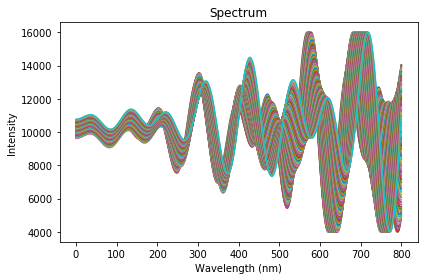

In [6]:
for i in range(sample):
    y = data[i,:]
    plt.plot(x, y)
    plt.title("Spectrum")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.tight_layout()

## Fourier transformation function

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


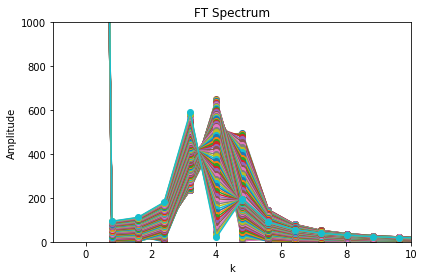

In [7]:
data_ft = np.zeros((sample, int(n/2)))
xf = np.linspace(0,1/(2*t),n/2)

for i in range(sample):
    data_ft[i,:] = fft(data[i,:int(n/2)])
    yf = 2/n * np.abs(data_ft[i,:])
    plt.plot(xf, yf, "-o")
    plt.ylim(0,1000)
    plt.xlim(-1,10)
    plt.title("FT Spectrum")
    plt.xlabel("k")
    plt.ylabel("Amplitude")
    plt.tight_layout()

## Fourier-transformed dataset overview

In [8]:
df_ft = pd.DataFrame(data_ft, columns=np.round(xf,2))
df_ft.head()

,0.00,0.80,1.60,2.40,3.21,4.01,4.81,5.61,6.41,7.21,...,392.79,393.59,394.39,395.19,395.99,396.79,397.60,398.40,399.20,400.00
0,5.072704e+06,41622.323225,43503.609705,32502.393299,-121502.617571,238793.176066,-247881.934883,-72388.522026,-39304.751761,-25606.438769,...,-18245.158829,-25606.438769,-39304.751761,-72388.522026,-247881.934883,238793.176066,-121502.617571,32502.393299,43503.609705,41622.323225
1,5.049590e+06,42098.439599,44038.629208,33067.089086,-121757.261802,245850.950626,-245139.765810,-72607.367055,-39549.901168,-25811.593562,...,-18416.394912,-25811.593562,-39549.901168,-72607.367055,-245139.765810,245850.950626,-121757.261802,33067.089086,44038.629208,42098.439599
2,5.025388e+06,42555.846268,44551.814744,33594.276576,-122160.090994,253036.525143,-242371.958058,-72794.513645,-39777.579895,-26005.358699,...,-18579.484250,-26005.358699,-39777.579895,-72794.513645,-242371.958058,253036.525143,-122160.090994,33594.276576,44551.814744,42555.846268
3,5.001376e+06,42957.329363,45004.108011,34053.800179,-122610.469309,260134.062959,-239370.666168,-72887.256071,-39953.384498,-26165.197002,...,-18718.303424,-26165.197002,-39953.384498,-72887.256071,-239370.666168,260134.062959,-122610.469309,34053.800179,45004.108011,42957.329363
4,5.015031e+06,42805.148123,44873.563456,34048.718554,-121700.646063,264070.623794,-233434.267577,-72049.737000,-39617.359041,-25989.253361,...,-18616.565147,-25989.253361,-39617.359041,-72049.737000,-233434.267577,264070.623794,-121700.646063,34048.718554,44873.563456,42805.148123


## Generate simulated depth as target label

In [9]:
depth = [0.1*i + 50 + np.random.random() for i in range(sample)]

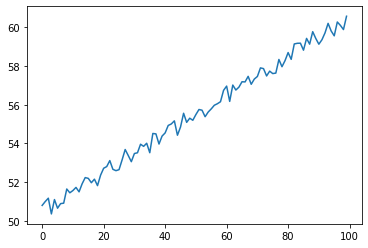

In [10]:
plt.plot(depth)

In [11]:
df_ft["Depth"] = depth

## Build Machine Learning models

In [12]:
lr = LinearRegression()

In [13]:
en = ElasticNet(alpha=1000)

In [14]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

## K-fold cross validation

In [15]:
kf = KFold(n_splits=10)
lr_mse_list = []
en_mse_list = []
rf_mse_list = []

X = np.asarray(df_ft[np.round(xf,2)])
y = np.asarray(df_ft["Depth"]).reshape(sample,)

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    lr.fit(X_train, y_train)
    en.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    pred_lr = lr.predict(X_test)
    pred_en = en.predict(X_test)
    pred_rf = rf.predict(X_test)
    
    mse_lr = mean_squared_error(y_test, pred_lr)
    mse_en = mean_squared_error(y_test, pred_en)
    mse_rf = mean_squared_error(y_test, pred_rf)
    
    lr_mse_list.append(mse_lr)
    en_mse_list.append(mse_en)
    rf_mse_list.append(mse_rf)

In [16]:
np.mean(lr_mse_list), np.mean(en_mse_list), np.mean(rf_mse_list)

(7.633156944663712, 0.0855444204205903, 0.5905262566791081)

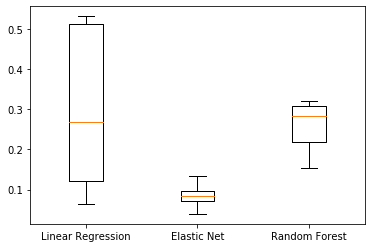

In [17]:
plt.boxplot([lr_mse_list, en_mse_list, rf_mse_list], sym="")
plt.xticks([1,2,3],["Linear Regression", "Elastic Net", "Random Forest"]);

## 6/4 split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [19]:
en.fit(X_train, y_train)
en.score(X_test, y_test)

0.9886301471088351

## Learning curve

In [20]:
lr = LinearRegression()
en = ElasticNet(alpha=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
model_list = [lr, en, rf]
model_name_list = ["Linear Regression", "Elastic Net", "Random Forest"]

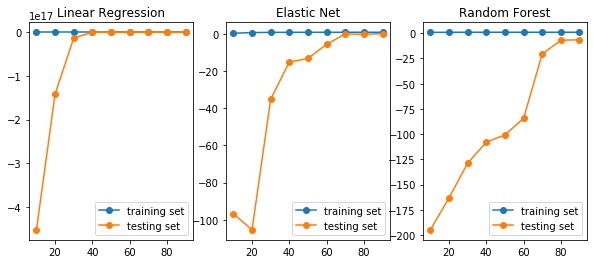

In [21]:
size_list = [int(i) for i in np.linspace(10,90,9)]

fig = plt.figure(figsize=(10,4))

for index, m in enumerate(model_list):
    train_sizes, train_scores, test_scores = learning_curve(m, X, y, train_sizes=size_list, cv=10)
    train_mean_list = []
    test_mean_list = []
    
    for i in range(len(size_list)):
        train_mean = np.mean(train_scores[i])
        test_mean = np.mean(test_scores[i])

        train_mean_list.append(train_mean)
        test_mean_list.append(test_mean)    
    
    ax = fig.add_subplot(1,3,index+1)
    plt.plot(size_list, train_mean_list, "-o", label="training set")
    plt.plot(size_list, test_mean_list, "-o", label="testing set")
    plt.legend()
    plt.title("{}".format(model_name_list[index]))